Importamos librerías

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Paso 1: Preparar los Datos
Primero, necesitas estructurar los datos en un formato que Geopandas pueda utilizar. Puedes crear un DataFrame con los nombres de las alcaldías y sus respectivas cuentas.

In [6]:


# Datos de las alcaldías y sus conteos
data = {
    'Municipio': [
        'Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 
        'CHALCO', 'Coyoacán', 'Cuauhtémoc', 
        'Gustavo A. Madero', 'Iztapalapa', 
        'La Magdalena Contreras', 'Miguel Hidalgo', 
        'Tlalpan', 'Xochimilco', 'Cuajimalpa de Morelos',
        'Venustiano Carranza', 'Tláhuac', 'Iztacalco', 'Milpa Alta'
    ],
    'COUNTA': [5, 2, 11, 1, 4, 4, 1, 3, 1, 2, 3, 1, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

Paso 2: Cargar el Mapa de las Alcaldías
Necesitarás un shapefile que contenga la geometría de las alcaldías de la Ciudad de México. Puedes encontrar este archivo en diversas fuentes en línea o en portales de datos abiertos del gobierno. Una vez que lo tengas, puedes cargarlo usando Geopandas.

In [75]:
# Cargar el shapefile (asegúrate de cambiar la ruta al archivo correcto)
cdmx = gpd.read_file('/home/luis-loreto/Documentos/Pedidos/Amanda/cdmx/poligonos_alcaldias_cdmx.shp')
edomex = gpd.read_file('/home/luis-loreto/Documentos/Pedidos/Amanda/edomex/delmun2017.shp')


Paso 3: Unir los Datos
Ahora debes unir tus datos con el GeoDataFrame que contiene el mapa. Esto se hace utilizando una clave común; asegúrate de que los nombres coincidan.

In [76]:
# Asegúrate de que el nombre del municipio en el shapefile coincida con el DataFrame
cdmx = cdmx.rename(columns={'NOMGEO': 'Municipio'})  # Cambia esto según el nombre real en tu shapefile
edomex = edomex.rename(columns={'municipi_2': 'Municipio'})  # Cambia esto según el nombre real en tu shapefile

# Unir los datos
cdmx = cdmx.merge(df, on='Municipio')
edomex = edomex.merge(df, on='Municipio')

Paso 4: Visualizar el Mapa
Finalmente, puedes visualizar el mapa utilizando Matplotlib. Puedes usar un esquema de color para representar la cantidad de cada alcaldía.

In [81]:
cdmx.to_crs(cdmx["geometry"])

ValueError: The truth value of a GeoSeries is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

/tmp/ipykernel_5265/1319667106.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(cdmx.geometry.centroid.x, cdmx.geometry.centroid.y, cdmx['Municipio']):


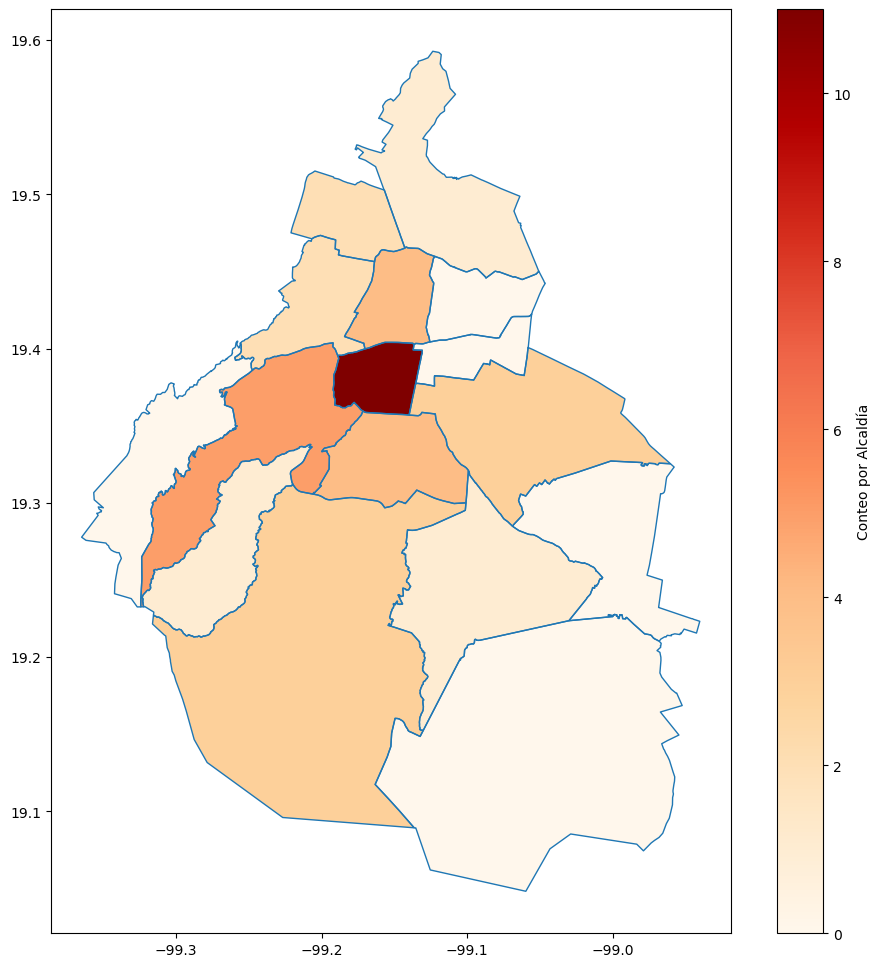

ValueError: Image size of 77867x15093 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x1000 with 1 Axes>

In [62]:
# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
cdmx.boundary.plot(ax=ax, linewidth=1)
cdmx.plot(column='COUNTA', ax=ax, legend=True,cmap='OrRd',
                  legend_kwds={'label': "Conteo por Alcaldía",
                               'orientation': "vertical" })

fig, ax = plt.subplots(figsize=(10, 10))
for x, y, label in zip(cdmx.geometry.centroid.x, cdmx.geometry.centroid.y, cdmx['Municipio']):
    ax.text(x, y, label, fontsize=12, ha='center')

# Títulos y etiquetas
plt.title('Mapa de Alcaldías de la Ciudad de México')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


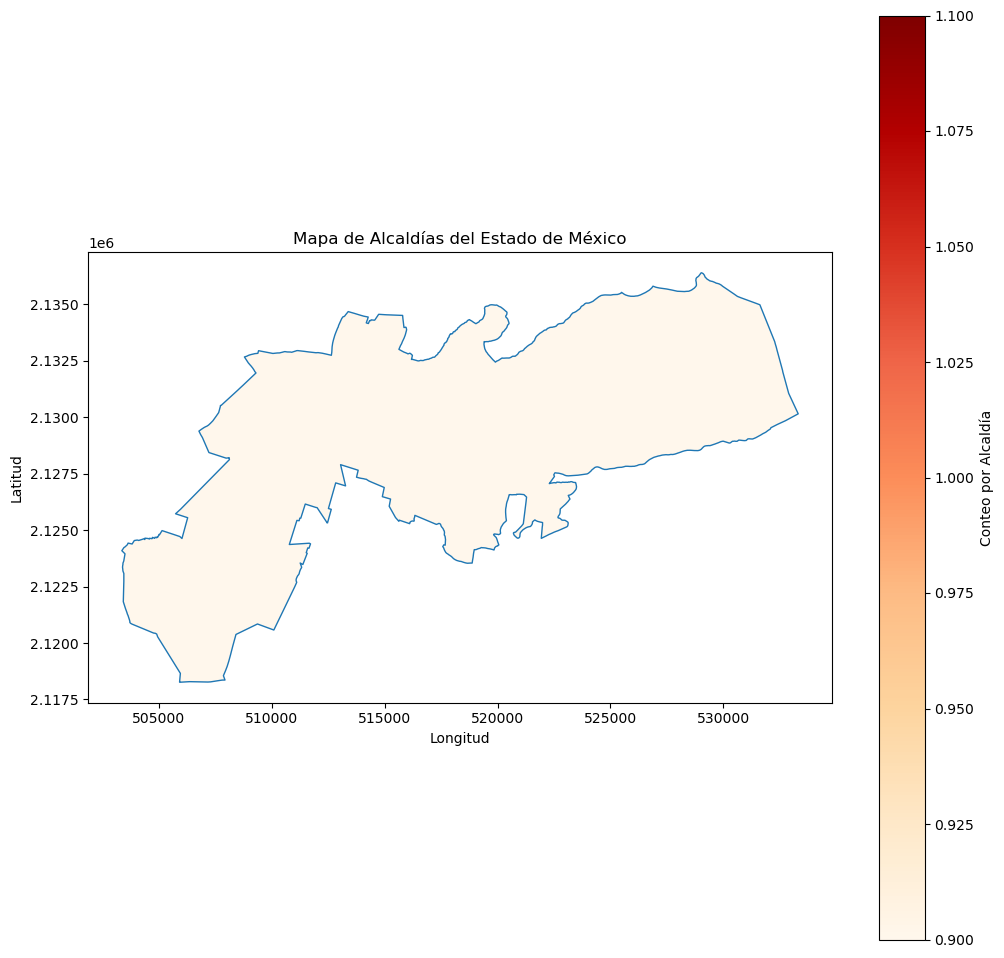

In [77]:
# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
edomex.boundary.plot(ax=ax, linewidth=1)
edomex.plot(column='COUNTA', ax=ax, legend=True,
                  legend_kwds={'label': "Conteo por Alcaldía",
                               'orientation': "vertical"},
                  cmap='OrRd')


# Títulos y etiquetas
plt.title('Mapa de Alcaldías del Estado de México')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [68]:
cdmx = cdmx[['Municipio', 'geometry']]
edomex = edomex[['Municipio', 'geometry']]

In [47]:
cdmx

,Municipio,geometry
0,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
1,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356..."
2,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400..."
3,Gustavo A. Madero,"POLYGON ((-99.11124 19.56150, -99.11485 19.557..."
4,Iztacalco,"POLYGON ((-99.05751 19.40673, -99.05753 19.406..."
5,Iztapalapa,"POLYGON ((-99.01692 19.38187, -99.01652 19.381..."
6,La Magdalena Contreras,"POLYGON ((-99.20819 19.33674, -99.20859 19.336..."
7,Milpa Alta,"POLYGON ((-98.99718 19.22747, -98.99723 19.227..."
8,Álvaro Obregón,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
9,Tláhuac,"POLYGON ((-98.97881 19.32392, -98.97856 19.323..."


In [48]:
print(edomex)

  Municipio                                           geometry
0    CHALCO  POLYGON Z ((512461.856 2125306.161 0.000, 5120...


In [46]:
result = pd.concat([cdmx, edomex], ignore_index=True)

ValueError: Cannot determine common CRS for concatenation inputs, got ['WGS 84', 'WGS 84 / UTM zone 14N']. Use `to_crs()` to transform geometries to the same CRS before merging.